In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
train_data = pd.read_csv('/Users/nithinrajulapati/Downloads/SMS spam detection/data/processed/train_data.csv')


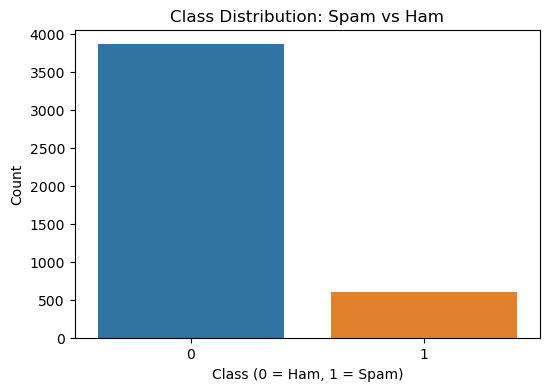

In [9]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_data)
plt.title('Class Distribution: Spam vs Ham')
plt.xlabel('Class (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()



/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


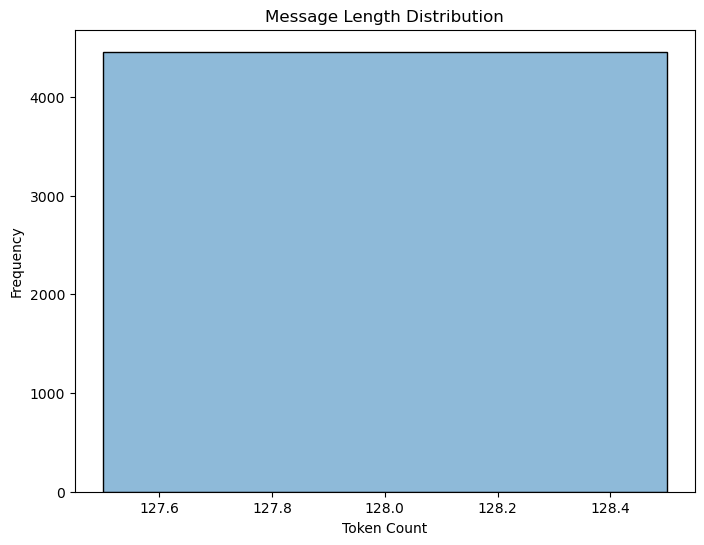

Basic statistics on message lengths:
count    4457.0
mean      128.0
std         0.0
min       128.0
25%       128.0
50%       128.0
75%       128.0
max       128.0
Name: message_length, dtype: float64


In [10]:
# Message lengths distribution
train_data['message_length'] = train_data['tokenized'].apply(lambda x: len(eval(x)))

plt.figure(figsize=(8, 6))
sns.histplot(train_data['message_length'], kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()

# Displaying some basic statistics
print("Basic statistics on message lengths:")
print(train_data['message_length'].describe())



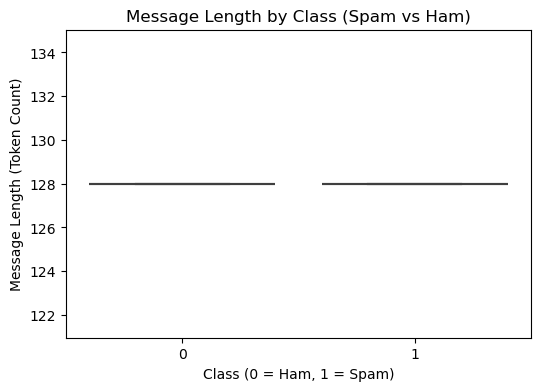

Index(['tokenized', 'attention_mask', 'label', 'message_length'], dtype='object')


In [16]:
# Correlation between the message length and label
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='message_length', data=train_data)
plt.title('Message Length by Class (Spam vs Ham)')
plt.xlabel('Class (0 = Ham, 1 = Spam)')
plt.ylabel('Message Length (Token Count)')
plt.show()

print(train_data.columns)


/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


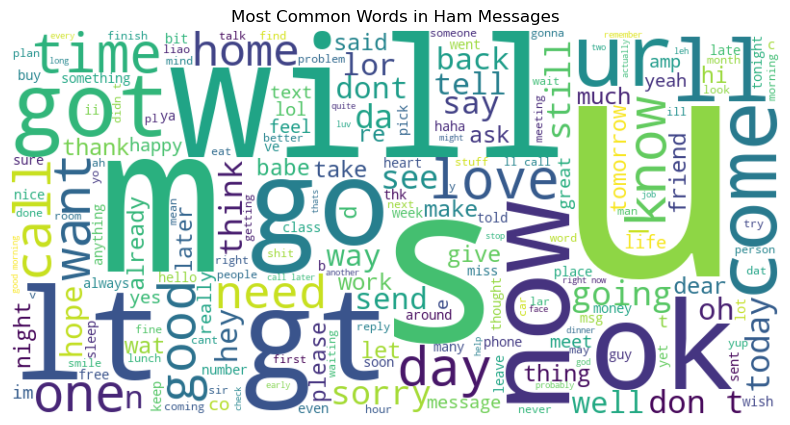

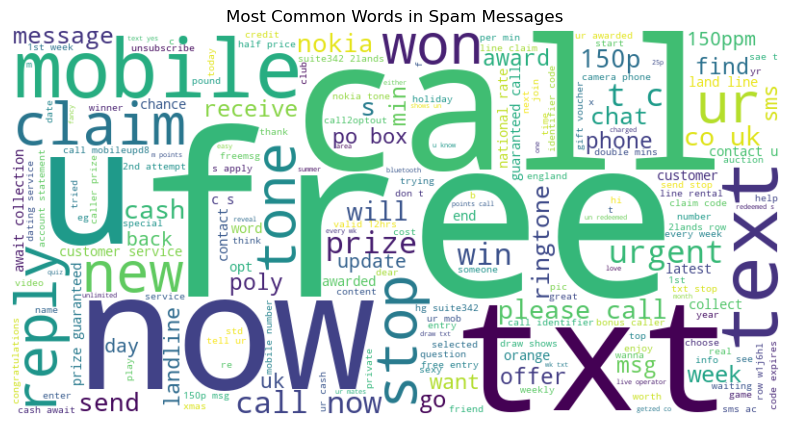

In [18]:
# Word cloud
from transformers import BertTokenizer
from wordcloud import WordCloud

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convert tokenized IDs back to text for ham and spam
ham_text = " ".join([tokenizer.decode(eval(i), skip_special_tokens=True) for i in train_data[train_data['label'] == 0]['tokenized']])
spam_text = " ".join([tokenizer.decode(eval(i), skip_special_tokens=True) for i in train_data[train_data['label'] == 1]['tokenized']])

# Generate word cloud for ham messages
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Most Common Words in Ham Messages')
plt.axis('off')
plt.show()

# Generate word cloud for spam messages
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Most Common Words in Spam Messages')
plt.axis('off')
plt.show()


/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


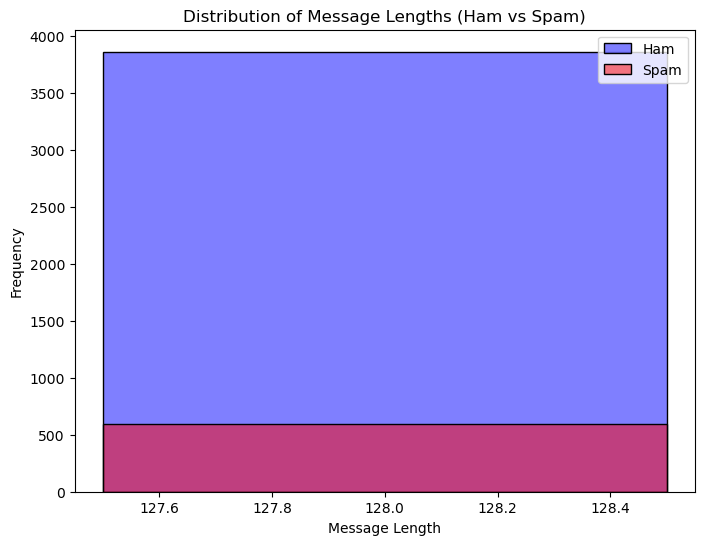

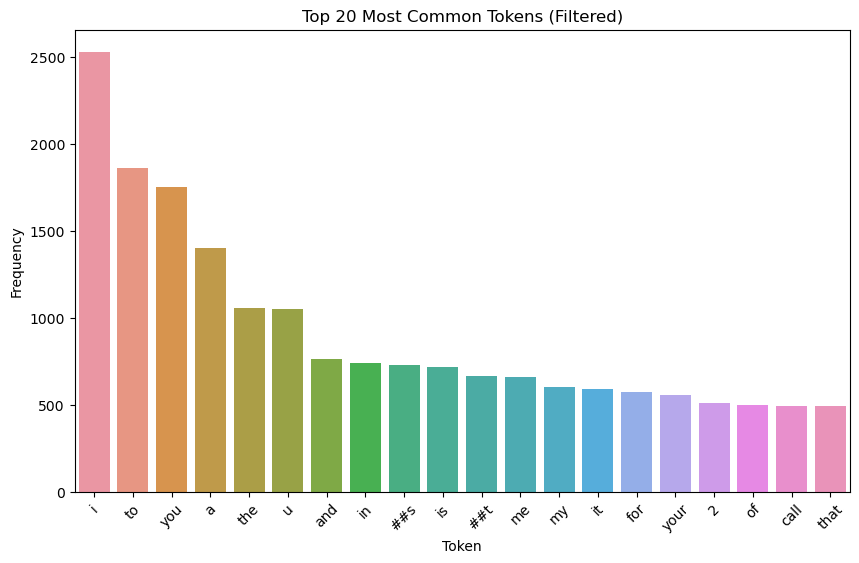

/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nithinrajulapati/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


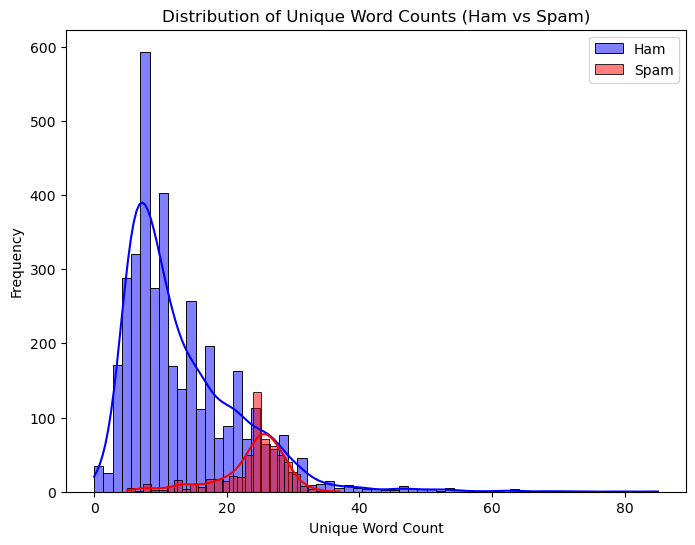

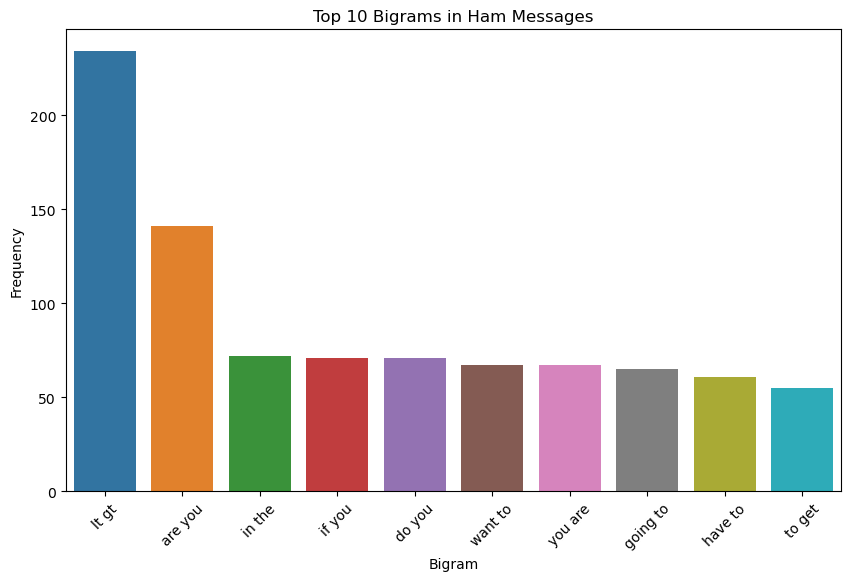

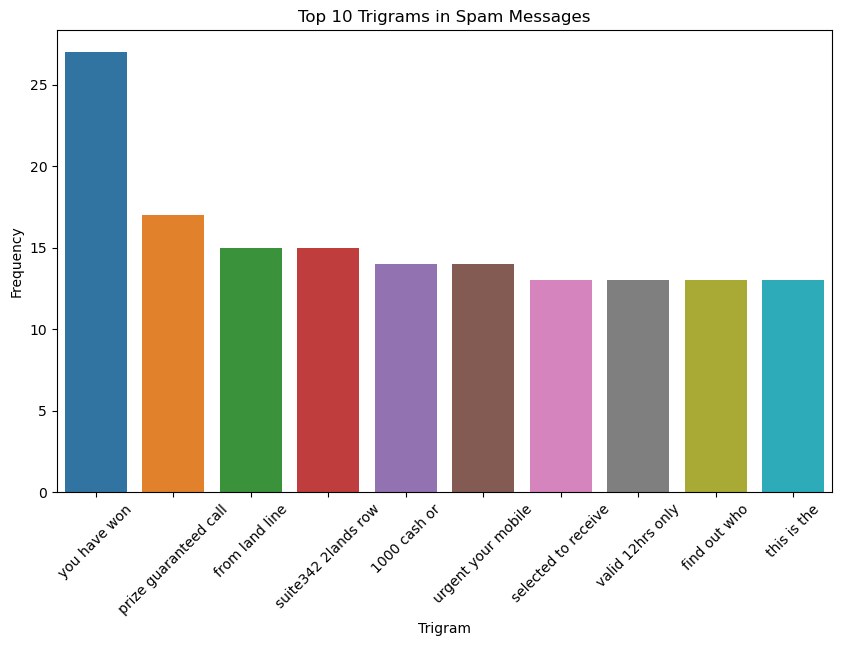

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer

# Loading the processed dataset
train_data = pd.read_csv('../data/processed/train_data.csv')

# Initializing the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Calculate message lengths based on tokenized data
train_data['message_length'] = train_data['tokenized'].apply(lambda x: len(eval(x)))

# 1. Distribution of Message Lengths (Before Padding)
plt.figure(figsize=(8, 6))
sns.histplot(train_data[train_data['label'] == 0]['message_length'], color='blue', kde=True, label='Ham')
sns.histplot(train_data[train_data['label'] == 1]['message_length'], color='red', kde=True, label='Spam')
plt.title('Distribution of Message Lengths (Ham vs Spam)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Token Frequency Plot (Convert tokenized data back to words)
all_tokens = [tokenizer.convert_ids_to_tokens(eval(i)) for i in train_data['tokenized']]

all_tokens_flat = [token for sublist in all_tokens for token in sublist]
token_freq = Counter(all_tokens_flat).most_common(20)

# Convert to DataFrame
token_df = pd.DataFrame(token_freq, columns=['Token', 'Frequency'])
# Filter out special tokens
all_tokens_flat_filtered = [token for token in all_tokens_flat if token not in ['[PAD]', '[CLS]', '[SEP]', '[MASK]']]
token_freq_filtered = Counter(all_tokens_flat_filtered).most_common(20)

# Plot filtered token frequencies
token_df_filtered = pd.DataFrame(token_freq_filtered, columns=['Token', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Token', y='Frequency', data=token_df_filtered)
plt.title('Top 20 Most Common Tokens (Filtered)')
plt.xticks(rotation=45)
plt.show()


# 3. Unique Word Count Distribution
train_data['unique_word_count'] = train_data['tokenized'].apply(lambda x: len(set(tokenizer.decode(eval(x), skip_special_tokens=True).split())))

plt.figure(figsize=(8, 6))
sns.histplot(train_data[train_data['label'] == 0]['unique_word_count'], color='blue', kde=True, label='Ham')
sns.histplot(train_data[train_data['label'] == 1]['unique_word_count'], color='red', kde=True, label='Spam')
plt.title('Distribution of Unique Word Counts (Ham vs Spam)')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 4. Bigram and Trigram Frequency (Ham and Spam)
def get_top_n_grams(corpus, ngram_range=(2, 2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the decoded text for bigram and trigram analysis
train_data['decoded_text'] = train_data['tokenized'].apply(lambda x: tokenizer.decode(eval(x), skip_special_tokens=True))

# Top 10 Bigrams for Ham Messages
ham_bigrams = get_top_n_grams(train_data[train_data['label'] == 0]['decoded_text'], ngram_range=(2, 2))
bigram_df = pd.DataFrame(ham_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Bigram', y='Frequency', data=bigram_df)
plt.title('Top 10 Bigrams in Ham Messages')
plt.xticks(rotation=45)
plt.show()

# Top 10 Trigrams for Spam Messages
spam_trigrams = get_top_n_grams(train_data[train_data['label'] == 1]['decoded_text'], ngram_range=(3, 3))
trigram_df = pd.DataFrame(spam_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Trigram', y='Frequency', data=trigram_df)
plt.title('Top 10 Trigrams in Spam Messages')
plt.xticks(rotation=45)
plt.show()
